In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_inputs_train = pd.read_csv('/content/drive/MyDrive/Credit_Risk_Modeling/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('/content/drive/MyDrive/Credit_Risk_Modeling/loan_data_targets_train.csv')
loan_data_inputs_test = pd.read_csv('/content/drive/MyDrive/Credit_Risk_Modeling/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('/content/drive/MyDrive/Credit_Risk_Modeling/loan_data_targets_test.csv')

In [3]:
loan_data_inputs_train.shape

(349713, 315)

In [4]:
loan_data_inputs_train.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
106118,6523005,8074948,3000,3000,3000.0,36 months,13.05,101.16,B,B5,...,0,0,0,1,0,0,0,0,0,0
447193,10073072,11924300,10000,10000,10000.0,36 months,7.90,312.91,A,A4,...,0,0,0,1,0,0,0,0,0,0


In [5]:
loan_data_inputs_train = loan_data_inputs_train.astype({col: 'int64' for col in loan_data_inputs_train.select_dtypes(include='bool').columns})

In [6]:
loan_data_inputs_test = loan_data_inputs_test.astype({col: 'int64' for col in loan_data_inputs_test.select_dtypes(include='bool').columns})

In [7]:
loan_data_targets_train.shape

(349713, 1)

In [8]:
loan_data_targets_train.head()

,good_bad
0,1
1,1
2,1
3,1
4,1


In [9]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86'
]]

In [10]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories.
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
106118,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
447193,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
185523,0,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
3151,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
82181,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
reg = LogisticRegression()
# We create an instance of an object from the 'LogisticRegression' class.

In [14]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [15]:
reg.intercept_

array([-0.62556784])

In [16]:
reg.coef_

array([[ 0.94572651,  0.84848817,  0.64830334,  0.48150071,  0.32862287,
         0.15562939,  0.07067482,  0.11016165,  0.04746311,  0.06371029,
         0.05208171,  0.08556761,  0.0976038 ,  0.13845131,  0.09229694,
         0.19718716,  0.28041695,  0.24202036,  0.25992775,  0.33120086,
         0.48063505,  0.08994629, -0.01970938,  0.29388084,  0.17382574,
         0.18974076,  0.25297117,  0.05192801,  0.06879447,  0.11911042,
         0.13637674,  0.089663  ,  0.08789677,  0.14984007,  1.07388322,
         0.87624134,  0.76559997,  0.5596198 ,  0.40902897,  0.15188719,
        -0.02967329,  1.06934639,  0.61777366,  0.35603217,  0.15049863,
         0.06887019,  0.041047  ,  0.06278134,  0.10760274,  0.10936659,
         0.02112892, -0.0144922 ,  0.32339084,  0.16493712, -0.03495371,
        -0.00528469, -0.04429919, -0.06825364, -0.08967251, -0.08015938,
        -0.13289525, -0.12594188, -0.01516213,  0.113074  , -0.02810174,
        -0.00420239,  0.03086436,  0.07146338,  0.0

In [17]:
feature_name = inputs_train.columns.values

In [18]:
pd.options.display.max_rows = None

In [19]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-0.625568
1,grade:A,0.945727
2,grade:B,0.848488
3,grade:C,0.648303
4,grade:D,0.481501
5,grade:E,0.328623
6,grade:F,0.155629
7,home_ownership:OWN,0.070675
8,home_ownership:MORTGAGE,0.110162
9,addr_state:NM_VA,0.047463


In [20]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)

        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values

        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [21]:
reg = LogisticRegression_with_p_values()

In [22]:
inputs_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 349713 entries, 106118 to 88708
Data columns (total 103 columns):
 #    Column                               Dtype
---   ------                               -----
 0    grade:A                              int64
 1    grade:B                              int64
 2    grade:C                              int64
 3    grade:D                              int64
 4    grade:E                              int64
 5    grade:F                              int64
 6    home_ownership:OWN                   int64
 7    home_ownership:MORTGAGE              int64
 8    addr_state:NM_VA                     int64
 9    addr_state:NY                        int64
 10   addr_state:OK_TN_MO_LA_MD_NC         int64
 11   addr_state:CA                        int64
 12   addr_state:UT_KY_AZ_NJ               int64
 13   addr_state:AR_MI_PA_OH_MN            int64
 14   addr_state:RI_MA_DE_SD_IN            int64
 15   addr_state:GA_WA_OR                  int64
 16   a

In [23]:
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.625568
1,grade:A,0.945727
2,grade:B,0.848488
3,grade:C,0.648303
4,grade:D,0.481501
5,grade:E,0.328623
6,grade:F,0.155629
7,home_ownership:OWN,0.070675
8,home_ownership:MORTGAGE,0.110162
9,addr_state:NM_VA,0.047463


In [25]:
p_values = reg.p_values

In [26]:
p_values = np.append(np.nan, np.array(p_values))

In [27]:
summary_table['p_values'] = p_values

In [28]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.625568,NaN
1,grade:A,0.945727,1.091915e-22
2,grade:B,0.848488,4.534193e-41
3,grade:C,0.648303,2.118689e-28
4,grade:D,0.481501,5.755109e-18
5,grade:E,0.328623,4.300760e-11
6,grade:F,0.155629,2.769444e-03
7,home_ownership:OWN,0.070675,6.816707e-04
8,home_ownership:MORTGAGE,0.110162,5.839585e-17
9,addr_state:NM_VA,0.047463,1.529064e-01


Each original independent variable is represented by several dummy variables.

If one or few dummy variables representing one original independent variable are statistically significant, it would be best to retain all dummy variables that represent that original independent variable.

In [29]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86'
]]

In [30]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [31]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
106118,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
447193,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
185523,0,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
3151,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
82181,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [32]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
feature_name = inputs_train.columns.values

In [34]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.413792
1,grade:A,0.886496
2,grade:B,0.703237
3,grade:C,0.502003
4,grade:D,0.335799
5,grade:E,0.200461
6,grade:F,0.034153
7,home_ownership:OWN,0.068502
8,home_ownership:MORTGAGE,0.109855
9,addr_state:NM_VA,0.055564


In [35]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.413792,NaN
1,grade:A,0.886496,1.394511e-20
2,grade:B,0.703237,2.963267e-28
3,grade:C,0.502003,2.271999e-17
4,grade:D,0.335799,2.311380e-09
5,grade:E,0.200461,5.985081e-05
6,grade:F,0.034153,5.104189e-01
7,home_ownership:OWN,0.068502,9.700196e-04
8,home_ownership:MORTGAGE,0.109855,5.276496e-17
9,addr_state:NM_VA,0.055564,9.294870e-02


In [36]:
import pickle

In [37]:
save_path = '/content/drive/My Drive/pd_model.sav'
pickle.dump(reg2, open(save_path, 'wb'))

In [38]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86'
]]

In [39]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [40]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
396946,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
299861,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
363085,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
15993,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
336413,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [41]:
y_hat_test = reg2.model.predict(inputs_test)

In [42]:
y_hat_test[0]

1

In [43]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

get all arrays. from each array, get the 2nd element

In [44]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [45]:
y_hat_test_proba.shape

(116572,)

In [46]:
y_hat_test_proba

array([0.89855294, 0.87056793, 0.90209073, ..., 0.9154765 , 0.90425377,
       0.95020743])

In [47]:
# y_hat_test_proba = y_hat_test_proba.reshape(-1, 1)

In [48]:
loan_data_targets_test_temp = loan_data_targets_test

In [49]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [50]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [51]:
df_actual_predicted_probs.head()

,good_bad,0
0,0,0.898553
1,1,0.870568
2,1,0.902091
3,1,0.874286
4,1,0.959630


In [52]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [53]:
df_actual_predicted_probs.shape

(116572, 2)

In [54]:
df_actual_predicted_probs.head(2)

,loan_data_targets_test,y_hat_test_proba
0,0,0.898553
1,1,0.870568


**Accuracy and area under the curve**

In [55]:
df_actual_predicted_probs['loan_data_targets_test'].value_counts()

,count
loan_data_targets_test,
1,103634
0,12938


In [56]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [57]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,9184,3754
1,44474,59160


In [58]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078784,0.032203
1,0.381515,0.507498


In [59]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5862814397968638

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

In [61]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99976812, 0.99976812,
        1.        ]),
 array([0.00000000e+00, 9.64934288e-06, 3.34832198e-03, ...,
        9.99990351e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99273722, 0.98726997, ..., 0.51337394, 0.5032021 ,
        0.47503723]))

In [62]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

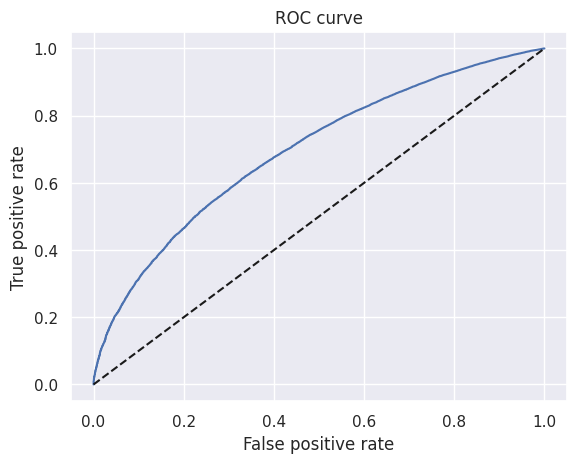

In [64]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [65]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [66]:
AUROC

0.6953005504498895

**Gini and Kolmogorov-Smirnov**

In [67]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [68]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42005,0,0.475037,0
45940,0,0.483539,0
1454,0,0.497887,0
57112,1,0.503202,0
72564,0,0.513374,0


In [69]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42850,1,0.991609,1
92605,1,0.991640,1
44191,1,0.991718,1
81711,1,0.992593,1
104791,1,0.992737,1


In [70]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [71]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42005,0,0.475037,0
1,45940,0,0.483539,0
2,1454,0,0.497887,0
3,57112,1,0.503202,0
4,72564,0,0.513374,0


In [72]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# calculating the cumulative number of all observations.
# using the new index for that. Since indexing in python starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# calculating cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# calculating cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [73]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# calculating the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# calculating cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# calculating the cumulative percentage of 'bad'.

In [74]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42005,0,0.475037,0,1,0,1,0.000009,0.00000,0.000077
1,45940,0,0.483539,0,2,0,2,0.000017,0.00000,0.000155
2,1454,0,0.497887,0,3,0,3,0.000026,0.00000,0.000232
3,57112,1,0.503202,0,4,1,3,0.000034,0.00001,0.000232
4,72564,0,0.513374,0,5,1,4,0.000043,0.00001,0.000309


In [75]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
116567,42850,1,0.991609,1,116568,103630,12938,0.999966,0.999961,1.0
116568,92605,1,0.991640,1,116569,103631,12938,0.999974,0.999971,1.0
116569,44191,1,0.991718,1,116570,103632,12938,0.999983,0.999981,1.0
116570,81711,1,0.992593,1,116571,103633,12938,0.999991,0.999990,1.0
116571,104791,1,0.992737,1,116572,103634,12938,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

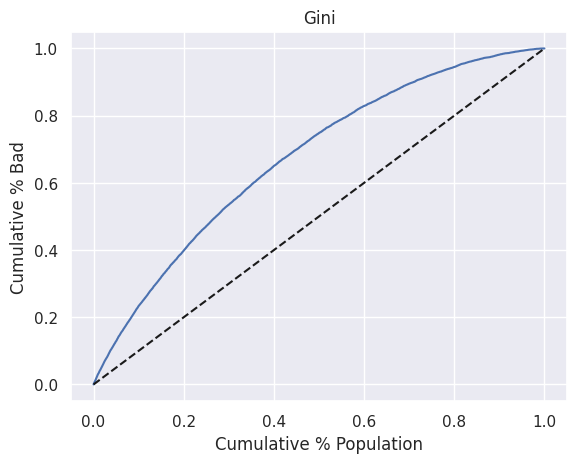

In [76]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

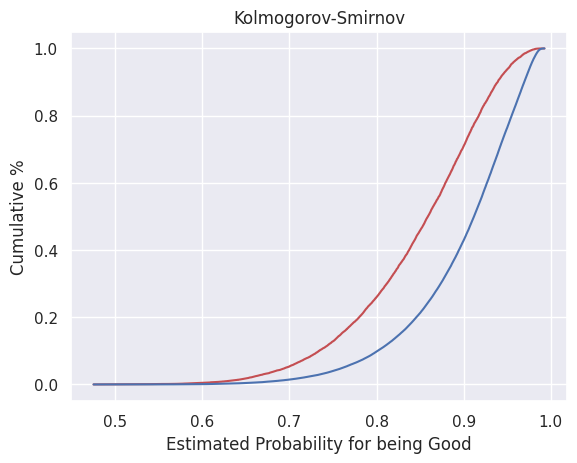

In [77]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [78]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.28319158037450803

## **Applying the model**

### Calculating the probability of default of individual accounts

In [79]:
pd.options.display.max_columns = None

In [80]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
396946,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
299861,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
363085,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
15993,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
336413,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [81]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.413792,NaN
1,grade:A,0.886496,1.394511e-20
2,grade:B,0.703237,2.963267e-28
3,grade:C,0.502003,2.271999e-17
4,grade:D,0.335799,2.311380e-09
5,grade:E,0.200461,5.985081e-05
6,grade:F,0.034153,5.104189e-01
7,home_ownership:OWN,0.068502,9.700196e-04
8,home_ownership:MORTGAGE,0.109855,5.276496e-17
9,addr_state:NM_VA,0.055564,9.294870e-02


In [82]:
y_hat_test_proba

array([0.89855294, 0.87056793, 0.90209073, ..., 0.9154765 , 0.90425377,
       0.95020743])

**Scorecard based on PD model**

In [83]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.413792,NaN
1,grade:A,0.886496,1.394511e-20
2,grade:B,0.703237,2.963267e-28
3,grade:C,0.502003,2.271999e-17
4,grade:D,0.335799,2.311380e-09
5,grade:E,0.200461,5.985081e-05
6,grade:F,0.034153,5.104189e-01
7,home_ownership:OWN,0.068502,9.700196e-04
8,home_ownership:MORTGAGE,0.109855,5.276496e-17
9,addr_state:NM_VA,0.055564,9.294870e-02


In [84]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [85]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

In [86]:
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


**PD models are converted to scorecards**

In [87]:
df_scorecard = pd.concat([summary_table, df_ref_categories])

In [88]:
df_scorecard = pd.concat([summary_table, df_ref_categories])

In [89]:
df_scorecard = df_scorecard.reset_index()

In [90]:
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.413792,NaN
1,1,grade:A,0.886496,1.394511e-20
2,2,grade:B,0.703237,2.963267e-28
3,3,grade:C,0.502003,2.271999e-17
4,4,grade:D,0.335799,2.311380e-09
5,5,grade:E,0.200461,5.985081e-05
6,6,grade:F,0.034153,5.104189e-01
7,7,home_ownership:OWN,0.068502,9.700196e-04
8,8,home_ownership:MORTGAGE,0.109855,5.276496e-17
9,9,addr_state:NM_VA,0.055564,9.294870e-02


In [91]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [92]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.413792,NaN,Intercept
1,1,grade:A,0.886496,1.394511e-20,grade
2,2,grade:B,0.703237,2.963267e-28,grade
3,3,grade:C,0.502003,2.271999e-17,grade
4,4,grade:D,0.335799,2.311380e-09,grade
5,5,grade:E,0.200461,5.985081e-05,grade
6,6,grade:F,0.034153,5.104189e-01,grade
7,7,home_ownership:OWN,0.068502,9.700196e-04,home_ownership
8,8,home_ownership:MORTGAGE,0.109855,5.276496e-17,home_ownership
9,9,addr_state:NM_VA,0.055564,9.294870e-02,addr_state


In [93]:
min_score = 300
max_score = 850

The minimum credit assessment is reached when a borrower falls into the 'worst' categories for all variables.

The maximum credit assessment is reached when borrower falls into the 'best' categories for all variables.

In [94]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

,Coefficients
Original feature name,
Intercept,-0.413792
acc_now_delinq,0.000000
addr_state,0.000000
annual_inc,-0.182388
dti,-0.162097
emp_length,0.000000
grade,0.000000
home_ownership,0.000000
initial_list_status,0.000000


In [95]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-0.9059592739254524

In [96]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

,Coefficients
Original feature name,
Intercept,-0.413792
acc_now_delinq,0.012439
addr_state,0.495937
annual_inc,0.424331
dti,0.154059
emp_length,0.152546
grade,0.886496
home_ownership,0.109855
initial_list_status,0.050336


In [97]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.3943571672915755

Need to rescale the coefficients to scores

In [98]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.413792,NaN,Intercept,-36.122887
1,1,grade:A,0.886496,1.394511e-20,grade,77.388618
2,2,grade:B,0.703237,2.963267e-28,grade,61.390628
3,3,grade:C,0.502003,2.271999e-17,grade,43.823440
4,4,grade:D,0.335799,2.311380e-09,grade,29.314303
5,5,grade:E,0.200461,5.985081e-05,grade,17.499683
6,6,grade:F,0.034153,5.104189e-01,grade,2.981437
7,7,home_ownership:OWN,0.068502,9.700196e-04,home_ownership,5.980075
8,8,home_ownership:MORTGAGE,0.109855,5.276496e-17,home_ownership,9.590073
9,9,addr_state:NM_VA,0.055564,9.294870e-02,addr_state,4.850566


The score of the intercept needs to be calculated in a different way

In [99]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

<ipython-input-99-f69c049793b7>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_scor

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.413792,NaN,Intercept,342.964823
1,1,grade:A,0.886496,1.394511e-20,grade,77.388618
2,2,grade:B,0.703237,2.963267e-28,grade,61.390628
3,3,grade:C,0.502003,2.271999e-17,grade,43.823440
4,4,grade:D,0.335799,2.311380e-09,grade,29.314303
5,5,grade:E,0.200461,5.985081e-05,grade,17.499683
6,6,grade:F,0.034153,5.104189e-01,grade,2.981437
7,7,home_ownership:OWN,0.068502,9.700196e-04,home_ownership,5.980075
8,8,home_ownership:MORTGAGE,0.109855,5.276496e-17,home_ownership,9.590073
9,9,addr_state:NM_VA,0.055564,9.294870e-02,addr_state,4.850566


In [100]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.413792,NaN,Intercept,342.964823,343.0
1,1,grade:A,0.886496,1.394511e-20,grade,77.388618,77.0
2,2,grade:B,0.703237,2.963267e-28,grade,61.390628,61.0
3,3,grade:C,0.502003,2.271999e-17,grade,43.823440,44.0
4,4,grade:D,0.335799,2.311380e-09,grade,29.314303,29.0
5,5,grade:E,0.200461,5.985081e-05,grade,17.499683,17.0
6,6,grade:F,0.034153,5.104189e-01,grade,2.981437,3.0
7,7,home_ownership:OWN,0.068502,9.700196e-04,home_ownership,5.980075,6.0
8,8,home_ownership:MORTGAGE,0.109855,5.276496e-17,home_ownership,9.590073,10.0
9,9,addr_state:NM_VA,0.055564,9.294870e-02,addr_state,4.850566,5.0


In [101]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

due to rounding

In [102]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
min_sum_score_prel

848.0

## **Calculating credit score**

In [103]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
396946,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
299861,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
363085,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
15993,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
336413,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [104]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.413792,NaN,Intercept,342.964823,343.0
1,1,grade:A,0.886496,1.394511e-20,grade,77.388618,77.0
2,2,grade:B,0.703237,2.963267e-28,grade,61.390628,61.0
3,3,grade:C,0.502003,2.271999e-17,grade,43.823440,44.0
4,4,grade:D,0.335799,2.311380e-09,grade,29.314303,29.0
5,5,grade:E,0.200461,5.985081e-05,grade,17.499683,17.0
6,6,grade:F,0.034153,5.104189e-01,grade,2.981437,3.0
7,7,home_ownership:OWN,0.068502,9.700196e-04,home_ownership,5.980075,6.0
8,8,home_ownership:MORTGAGE,0.109855,5.276496e-17,home_ownership,9.590073,10.0
9,9,addr_state:NM_VA,0.055564,9.294870e-02,addr_state,4.850566,5.0


In [105]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [106]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

<ipython-input-106-9eb7808d588c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)


In [107]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
396946,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
299861,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
363085,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
15993,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
336413,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [108]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [109]:
scorecard_scores = df_scorecard['Score - Preliminary']

In [110]:
inputs_test_with_ref_cat_w_intercept.shape

(116572, 101)

In [111]:
scorecard_scores.shape

(101,)

In [112]:
scorecard_scores = scorecard_scores.values.reshape(101, 1)

In [113]:
scorecard_scores.shape

(101, 1)

In [114]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [115]:
y_scores.head()

,0
Unnamed: 0,
396946,569.0
299861,545.0
363085,574.0
15993,549.0
336413,656.0


In [116]:
y_scores.tail()

,0
Unnamed: 0,
177088,548.0
355557,696.0
291341,587.0
367790,573.0
252804,636.0


From credit score to probability of default (PD)

In [117]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()


,0
Unnamed: 0,
396946,0.898025
299861,0.869953
363085,0.903152
15993,0.875050
336413,0.959769


They are not exactly equal because when calculating the scores, they were rounded.

In [118]:
y_hat_test_proba[0: 5]

array([0.89855294, 0.87056793, 0.90209073, 0.8742856 , 0.95963031])

**Setting Cut-offs**

How many borrowers would be accepted and rejected. what would the credit worthiness of the borrowers be?

If a bank wants more business, it will set cut of at higher PD.
If the bank wants to lend to fewer borrowers with higher credit worthiness, then will cut off at lower PD.

In [119]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [120]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,9184,3754
1,44474,59160


In [121]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078784,0.032203
1,0.381515,0.507498


In [122]:
from sklearn.metrics import roc_curve, roc_auc_score

In [123]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99976812, 0.99976812,
        1.        ]),
 array([0.00000000e+00, 9.64934288e-06, 3.34832198e-03, ...,
        9.99990351e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99273722, 0.98726997, ..., 0.51337394, 0.5032021 ,
        0.47503723]))

In [124]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

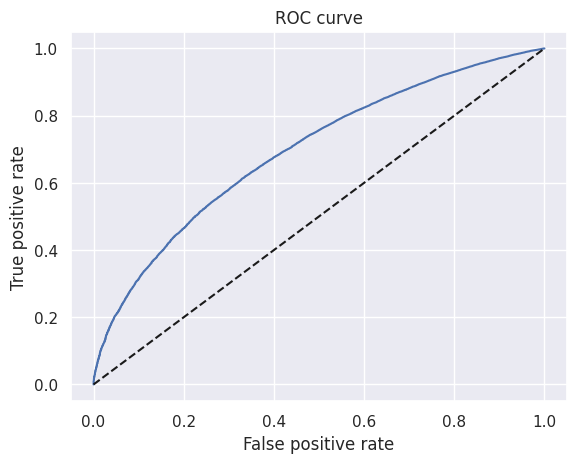

In [126]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [127]:
thresholds

array([       inf, 0.99273722, 0.98726997, ..., 0.51337394, 0.5032021 ,
       0.47503723])

In [128]:
thresholds.shape

(22041,)

In [129]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [130]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [131]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,0.992737,0.000000,0.000010
2,0.987270,0.000000,0.003348
3,0.987267,0.000077,0.003348
4,0.986668,0.000077,0.004593


The first threshold is is very big and does not predict anyhting. Setting the first threshold to a number very close to 1.

In [132]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

<ipython-input-132-78b92e8d0a90>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)


Calculating the score from threshold

In [133]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [134]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3586.0
1,0.992737,0.000000,0.000010,808.0
2,0.987270,0.000000,0.003348,759.0
3,0.987267,0.000077,0.003348,759.0
4,0.986668,0.000077,0.004593,755.0


The score for teh 1st threshold is very high. Should set it to the max_score

In [135]:
df_cutoffs['Score'][0] = max_score

<ipython-input-135-59a0fc4d7517>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['Score'][0] = max_score


In [136]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992737,0.000000,0.000010,808.0
2,0.987270,0.000000,0.003348,759.0
3,0.987267,0.000077,0.003348,759.0
4,0.986668,0.000077,0.004593,755.0


## Now to calculate the approval and rejection rate

### Number of approved + Number of rejected = Total
### Approval rate = Number of approved / Total
### Rejection rate = Number of rejected /Total
### Rejection rate = 1 - Approval rate

In [137]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [138]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [139]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,116572,0.000000,1.000000
1,0.992737,0.000000,0.000010,808.0,1,116571,0.000009,0.999991
2,0.987270,0.000000,0.003348,759.0,347,116225,0.002977,0.997023
3,0.987267,0.000077,0.003348,759.0,348,116224,0.002985,0.997015
4,0.986668,0.000077,0.004593,755.0,477,116095,0.004092,0.995908


In [140]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
22036,0.521693,0.999691,0.999981,387.0,116566,6,0.999949,0.000051
22037,0.514163,0.999691,0.999990,384.0,116567,5,0.999957,0.000043
22038,0.513374,0.999768,0.999990,384.0,116568,4,0.999966,0.000034
22039,0.503202,0.999768,1.000000,380.0,116569,3,0.999974,0.000026
22040,0.475037,1.000000,1.000000,370.0,116572,0,1.000000,0.000000


Assuming highest level of PD is 10% which means the probability of not defaulting would be 90%. In other words, the lowest possible probability of being good is 90%. With that cut off  we would have 53.94% approval rate and 46% rejection rate.

In [141]:
df_cutoffs.iloc[6000: 7200, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
6000,0.907983,0.245865,0.523834,579.0,57468,59104,0.492983,0.507017
6001,0.907980,0.245865,0.523872,579.0,57472,59100,0.493017,0.506983
6002,0.907979,0.245942,0.523872,579.0,57473,59099,0.493026,0.506974
6003,0.907957,0.245942,0.524008,579.0,57487,59085,0.493146,0.506854
6004,0.907953,0.246019,0.524008,579.0,57488,59084,0.493154,0.506846
6005,0.907941,0.246019,0.524085,579.0,57496,59076,0.493223,0.506777
6006,0.907940,0.246097,0.524085,579.0,57497,59075,0.493232,0.506768
6007,0.907925,0.246097,0.524162,579.0,57505,59067,0.493300,0.506700
6008,0.907925,0.246174,0.524162,579.0,57506,59066,0.493309,0.506691
6009,0.907918,0.246174,0.524191,579.0,57509,59063,0.493335,0.506665


Assuming highest level of PD is 5% which means the probability of not defaulting would be 95%. In other words, the lowest possible probability of being good is 95%. With that cut off  we would have 21.6% approval rate and 78.4% rejection rate.

In [142]:
df_cutoffs.iloc[1000: 2200, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.958413,0.038259,0.176911,653.0,18829,97743,0.161522,0.838478
1001,0.958377,0.038259,0.177229,653.0,18862,97710,0.161806,0.838194
1002,0.958376,0.038337,0.177229,653.0,18863,97709,0.161814,0.838186
1003,0.958336,0.038337,0.177529,653.0,18894,97678,0.162080,0.837920
1004,0.958336,0.038414,0.177529,653.0,18895,97677,0.162089,0.837911
1005,0.958308,0.038414,0.177712,653.0,18914,97658,0.162252,0.837748
1006,0.958306,0.038491,0.177712,653.0,18915,97657,0.162260,0.837740
1007,0.958299,0.038491,0.177731,653.0,18917,97655,0.162277,0.837723
1008,0.958296,0.038569,0.177731,653.0,18918,97654,0.162286,0.837714
1009,0.958276,0.038569,0.177818,653.0,18927,97645,0.162363,0.837637


In [143]:
# inputs_train_with_ref_cat.to_csv('/content/drive/My Drive/inputs_train_with_ref_cat.csv', index=False)

In [144]:
# df_scorecard.to_csv('/content/drive/My Drive/df_scorecard.csv', index=False)